# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Wahyu Reinaldy
- **Email:** mc220d5y1860@student.devacademy.id
- **ID Dicoding:** wahyureinaldy

## Menentukan Pertanyaan Bisnis

- Bagaimana pola peminjaman sepeda pada hari kerja dan akhir pekan  
  dapat dimanfaatkan untuk mengatur ketersediaan armada sepeda secara efisien?
- Sejauh mana kondisi cuaca memengaruhi tingkat peminjaman sepeda, dan
  bagaimana hal tersebut bisa digunakan untuk meningkatkan strategi promosi atau tarif?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from babel.numbers import format_currency
sns.set(style='dark')

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


In [3]:
#Membuat tabel untuk data day
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
#Membuat tabel untuk data hour
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Membuat tabel untuk data day dan hour
- Menampilkan data teratas setiap tabel
- yang berbeda dari kedua tabel adalah di tabel jam memiliki kolom jam sedangkan di tabel hari tidak ada kolom jam
- di tabel terdapat (id peminjam, tanggal peminjaman, musim, tahun, bulan, hari, jenis hari, cuaca, suhu, kelembapan, kecepatan angin, dan status peminjam, serta jumlah peminjaman)

### Assessing Data

**Menilai Data day_df**

In [5]:
#Memeriksa tipe data dan jumlah data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
#Memeriksa jumlah missing values
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
#Memeriksa jumlah duplikasi data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
#Memeriksa parameter statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Menilai Data hour_df**


In [9]:
#Memeriksa tipe data dan jumlah data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
#Memeriksa jumlah missing values
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [11]:
#Memeriksa jumlah duplikasi data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
#Memeriksa parameter statistik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Jumlah baris pada data day adalah 731 dan data hour adalah 17379
- Tidak ada missing values
- TIdak ada data duplikat
- parameter statistik terlihat normal
- namun kolom dteday pada kedua tabel masih bertipe object yang harusnya bertipe datetime64

### Cleaning Data

**Membersihkan Data day_df**

In [13]:
#Mengganti tipe data kolom dteday pada tabel day_df menjadi tipe data datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Membersihkan Data hour_df**

In [14]:
#Mengganti tipe data kolom dteday pada tabel hour_df menjadi tipe data datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])
  hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Mengganti tipe data object pada kolom dteday pada kedua tabel menjadi tipe data datetime64
- Mengecek kembali apakah tipe data sudah berubah atau belum

In [15]:
day_df.to_csv('day_clean.csv', index=False)
hour_df.to_csv('hour_clean.csv', index=False)

from google.colab import files
files.download('day_clean.csv')
files.download('hour_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

### Explore ...

**Explorasi data day_df**

In [16]:
#Melihat parameter statistik day_df
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [17]:
#Melihat peminjaman sepeda berdasarkan tipe peminjam dan berdasarkan hari
summary = day_df.groupby('workingday')[['casual', 'registered']].sum().reset_index()
summary['day_type'] = summary['workingday'].map({1: 'Hari Kerja', 0: 'Hari Libur'})
summary = summary[['day_type', 'casual', 'registered']]
summary.head()

,day_type,casual,registered
0,Hari Libur,316732,683537
1,Hari Kerja,303285,1989125


**Insight:**
- Total peminjaman oleh pengguna casual sedikit lebih tinggi pada hari libur dibanding hari kerja
- ini mungkin mengindikasikan bahwa pengguna casual lebih banyak menggunakan sepeda untuk kegiatan santai seperti rekreasi
- Pengguna register secara signifikan menggunakan sepeda pada hari kerja
- ini mungkin mengindikasikan bahwa pengguna register cenderung menggunakan sepeda untuk pergi bekerja atau untuk sekolah

In [18]:
#Melihat hari dimana peminjaman banyak terjadi
workingday_summary = day_df.groupby('workingday')['cnt'].agg(['mean', 'sum', 'count']).reset_index()
workingday_summary['day_type'] = workingday_summary['workingday'].map({1: 'Working Day', 0: 'Weekend/Holiday'})
workingday_summary = workingday_summary[['day_type', 'mean', 'sum', 'count']]
print("1. Peminjaman berdasarkan jenis hari (workingday)")
display(workingday_summary)

1. Peminjaman berdasarkan jenis hari (workingday)


,day_type,mean,sum,count
0,Weekend/Holiday,4330.168831,1000269,231
1,Working Day,4584.820000,2292410,500


**insight**
- peminjaman sepeda banyak terjadi di hari kerja
- mengindikasikan bahwa yang meminjam sepeda adalah orang yang berkebutuhan untuk kerja atau sekolah

In [19]:
#Melihat peminjaman berdasarkan kondisi cuaca
weather_summary = day_df.groupby('weathersit')['cnt'].agg(['mean', 'sum', 'count']).reset_index()
weather_summary['weather_desc'] = weather_summary['weathersit'].map({
    1: 'Clear / Few Clouds (Good)',
    2: 'Mist / Cloudy',
    3: 'Light Snow / Light Rain',
    4: 'Heavy Rain / Snow (Bad)'
})
weather_summary = weather_summary[['weather_desc', 'mean', 'sum', 'count']]
print("\n2. Peminjaman berdasarkan kondisi cuaca")
display(weather_summary)


2. Peminjaman berdasarkan kondisi cuaca


,weather_desc,mean,sum,count
0,Clear / Few Clouds (Good),4876.786177,2257952,463
1,Mist / Cloudy,4035.862348,996858,247
2,Light Snow / Light Rain,1803.285714,37869,21


**insight**
- saat cuaca cerah atau berawan ringan, jumlah peminjaman tinggi
- pada saat kondisi cuaca berkabut atau mendung, jumlah peminjaman
  menurun
- saat terjadi hujan ringan atau salju ringan, peminjaman sepeda turun
  drastis
- saat cuaca ekstrim hampir tidak ada peminjaman sepeda yang terjadi

**Exploratory hour_df**

In [20]:
#Melihat parameter statistik day_df
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [21]:
#berapa total jam pemakaian yang digunakan oleh pengguna casual dan pengguna register
total_casual = hour_df['casual'].sum()
total_registered = hour_df['registered'].sum()
summary_1 = pd.DataFrame({
    'Tipe Pengguna': ['Casual', 'Registered'],
    'Total Jam Pemakaian': [total_casual, total_registered]})
summary_1.head()

,Tipe Pengguna,Total Jam Pemakaian
0,Casual,620017
1,Registered,2672662


**insight**
- Pengguna register jauh lebih aktif menggunakan sepeda dibandingkan pengguna casual
- Pengguna register cenderung menggunakan sepeda lebih aktif dan rutin misalnya untuk berangkat sekolah dan kerja
- Pengguna casual mungkin menggunakan sepeda untuk berekreasi yang menunjukkan bahwa pemakaiannya lebih musiman

## Visualization & Explanatory Analysis

### Pertanyaan 1:
- Bagaimana pola peminjaman sepeda pada hari kerja dan akhir pekan
  dapat dimanfaatkan untuk mengatur ketersediaan armada sepeda secara efisien?

<ipython-input-25-1f518aa78192>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=day_df, x='workingday', y='cnt', estimator='mean', ci=None)


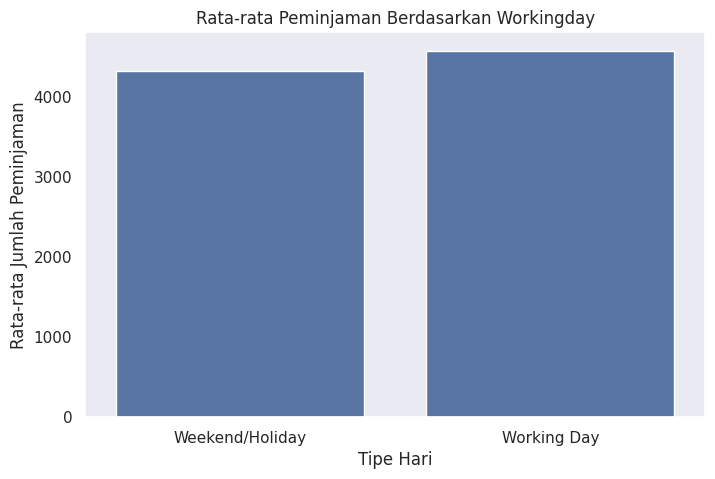

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(data=day_df, x='workingday', y='cnt', estimator='mean', ci=None)
plt.xticks([0, 1], ['Weekend/Holiday', 'Working Day'])
plt.title('Rata-rata Peminjaman Berdasarkan Workingday')
plt.xlabel('Tipe Hari')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.show()

### Pertanyaan 2:
- Sejauh mana kondisi cuaca memengaruhi tingkat peminjaman sepeda, dan
  bagaimana hal tersebut bisa digunakan untuk meningkatkan strategi promosi atau tarif?

<ipython-input-23-c2067cef3e16>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=day_df, x='weathersit', y='cnt', estimator='mean', ci=None)


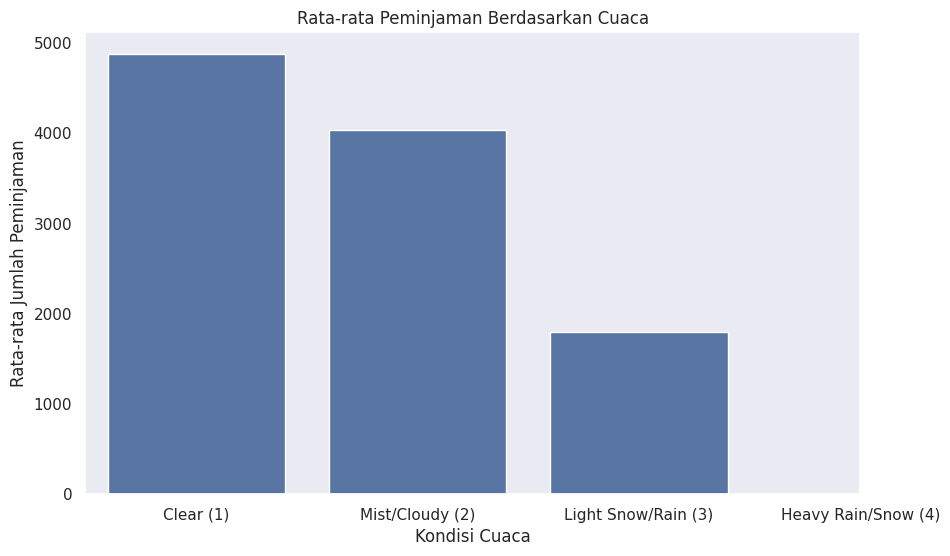

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(data=day_df, x='weathersit', y='cnt', estimator='mean', ci=None)
plt.xticks([0,1,2,3], ['Clear (1)', 'Mist/Cloudy (2)', 'Light Snow/Rain (3)', 'Heavy Rain/Snow (4)'])
plt.title('Rata-rata Peminjaman Berdasarkan Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.show()

**Insight:**
- Pada tabel pertama data menunjukkan indikasi rata rata peminjaman di
  hari kerja sedikit lebih tinggi dibanding hari libur
- menandakan penggunaan sepeda lebih banyak dipakai dengan rutin oleh orang yang bekerja atau anak yang pergi ke sekolah
- pada tabel kedua menunjukkan peminjaman signifikan naik saat cuaca bagus dan berangsur menurun saat cuaca buruk
- pada saat keaadaan cuaca yang paling buruk tidak ada orang yang mau meminjam sepeda

## Analisis Lanjutan (Opsional)

## Conclusion

  pertanyaan pertama


*   Pada hari kerja armada sepeda harus difokuskan pada area permukiman dan pusat
    bisnis pada jam sibuk pagi dan sore
*   Pada hari kerja bisa diberlakukan rotasi armada di siang hari untuk efisiensi.

*   Pada hari libur Perlu distribusi sepeda yang lebih merata ke area rekreasi, taman,
    dan pusat wisata
*   Pada hari libur penjadwalan maintenance sepeda bisa dilakukan di pagi atau malam hari





pertanyaan kedua


*   Lakukan promosi aktif saat cuaca cerah atau prakiraan cuaca mendukung, seperti diskon atau bundling perjalanan.
*   Bisa diberlakukan tarif insentif saat cuaca mendung atau kurang ideal untuk mendorong pemakaian.
*   Optimalkan distribusi sepeda saat cuaca baik, dan siapkan pengurangan armada atau penjadwalan ulang saat cuaca buruk diperkirakan.


